In [1]:
import pandas as pd
import numpy as np
import requests as rq

In [2]:
r=rq.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv')
with open('auto.csv','w') as f:
    f.write(r.text)

/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [3]:
df=pd.read_csv('auto.csv')
df.head(5)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
df.tail(10)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
194,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
195,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
196,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
197,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
198,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
203,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [5]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [6]:
df.columns=headers

In [7]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [8]:
df1=df.replace('?',np.nan)
df1.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [9]:
df=df1.dropna(subset=['price'],axis=0)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [10]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [11]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,10.170100,25.200000,30.705000
std,1.248557,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,4.014163,6.432487,6.827227
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [12]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,200.000000,164,200,200,200,198,200,200,200,200.000000,...,200.000000,200,196,196,200.000000,198,198,200.000000,200.000000,200
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,58,22,NaN,NaN,185
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,16500
freq,NaN,11,32,180,164,113,94,118,197,NaN,...,NaN,91,23,19,NaN,19,36,NaN,NaN,2
mean,0.830000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.848000,...,126.860000,NaN,NaN,NaN,10.170100,NaN,NaN,25.200000,30.705000,NaN
std,1.248557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.038261,...,41.650501,NaN,NaN,NaN,4.014163,NaN,NaN,6.432487,6.827227,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.750000,NaN,NaN,NaN,8.575000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,119.500000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,142.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [13]:
missing=df.isnull()
missing.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
for c in missing.columns.tolist():
    print(c)
    print(missing[c].value_counts())
    print('')

symboling
False    200
Name: symboling, dtype: int64

normalized-losses
False    164
True      36
Name: normalized-losses, dtype: int64

make
False    200
Name: make, dtype: int64

fuel-type
False    200
Name: fuel-type, dtype: int64

aspiration
False    200
Name: aspiration, dtype: int64

num-of-doors
False    198
True       2
Name: num-of-doors, dtype: int64

body-style
False    200
Name: body-style, dtype: int64

drive-wheels
False    200
Name: drive-wheels, dtype: int64

engine-location
False    200
Name: engine-location, dtype: int64

wheel-base
False    200
Name: wheel-base, dtype: int64

length
False    200
Name: length, dtype: int64

width
False    200
Name: width, dtype: int64

height
False    200
Name: height, dtype: int64

curb-weight
False    200
Name: curb-weight, dtype: int64

engine-type
False    200
Name: engine-type, dtype: int64

num-of-cylinders
False    200
Name: num-of-cylinders, dtype: int64

engine-size
False    200
Name: engine-size, dtype: int64

fuel-system
Fa

In [15]:
avg_n=df['normalized-losses'].astype('float').mean(axis=0)

In [16]:
df['normalized-losses'].replace(np.nan,avg_n,inplace=True)

<ipython-input-16-00bbbc54da51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalized-losses'].replace(np.nan,avg_n,inplace=True)


In [17]:
df['normalized-losses'].isnull().sum()

0

In [18]:
avg_s=df['stroke'].astype(float).mean()

In [19]:
df['stroke'].replace(np.nan,avg_s,inplace=True)

<ipython-input-19-88e8935796fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stroke'].replace(np.nan,avg_s,inplace=True)


In [20]:
df['stroke'].isnull().sum()

0

In [21]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

<ipython-input-21-4429c30e6fc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)


In [22]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)

In [23]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

<ipython-input-23-397e1f287409>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)


In [24]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [25]:
df['num-of-doors'].replace(np.nan,'four',inplace=True)

<ipython-input-25-d40d5c7ee598>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num-of-doors'].replace(np.nan,'four',inplace=True)


In [26]:
df.dropna(subset=['price'],inplace=True,axis=0)

<ipython-input-26-55eaa23256bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['price'],inplace=True,axis=0)


In [29]:
df.reset_index(drop=True,inplace=True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
9,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925


In [31]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [32]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype(float)
df[["normalized-losses"]] = df[["normalized-losses"]].astype(int)
df[["price"]] = df[["price"]].astype(float)
df[["peak-rpm"]] = df[["peak-rpm"]].astype(float)

<ipython-input-32-4f3ef143169e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["bore", "stroke"]] = df[["bore", "stroke"]].astype(float)
<ipython-input-32-4f3ef143169e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["normalized-losses"]] = df[["normalized-losses"]].astype(int)
<ipython-input-32-4f3ef143169e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [33]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [34]:

df['city-L/100km']=235/df['city-mpg']

df.head()

<ipython-input-34-a8d051010e75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city-L/100km']=235/df['city-mpg']


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0,12.368421


In [36]:
df['length']=df['length']/df['length'].max()

<ipython-input-36-98962a4f8c49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length']=df['length']/df['length'].max()


In [37]:
df['width']=(df['width']-df['width'].mean())/df['width'].std()

<ipython-input-37-06aae17070ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['width']=(df['width']-df['width'].mean())/df['width'].std()


In [38]:
df['horsepower']=df['horsepower'].astype(int)

<ipython-input-38-c1b78870ed9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower']=df['horsepower'].astype(int)


In [51]:
bins=np.linspace(df['horsepower'].min(),df['horsepower'].max(),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [58]:
group_n=['Low','medium','high']

In [59]:
df['horsepower-binned']=pd.cut(df['horsepower'],bins,labels=group_n,include_lowest=True)

<ipython-input-59-1ec367cfd29d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower-binned']=pd.cut(df['horsepower'],bins,labels=group_n,include_lowest=True)


In [60]:
df[['horsepower','horsepower-binned']].head(5)

,horsepower,horsepower-binned
0,111,Low
1,154,medium
2,102,Low
3,115,Low
4,110,Low


In [61]:
df["horsepower-binned"].value_counts()

Low       152
medium     43
high        5
Name: horsepower-binned, dtype: int64

In [63]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'horsepower bins')

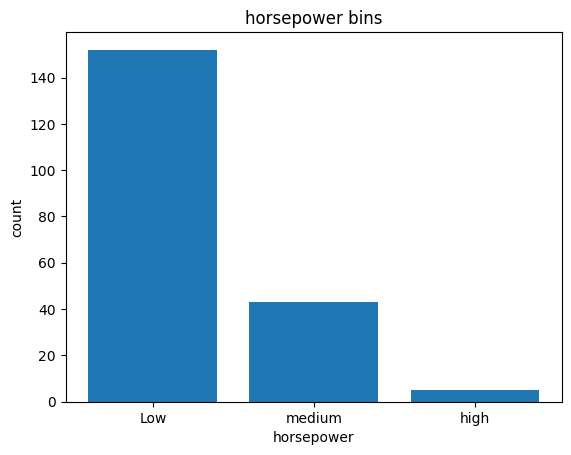

In [70]:
plt.bar(group_n,df["horsepower-binned"].value_counts())
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')

Text(0.5, 1.0, 'horsepower bins')

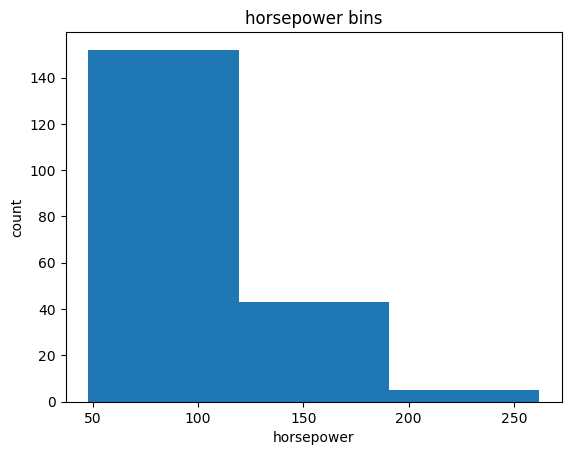

In [73]:
plt.hist(df["horsepower"], bins = 3)


plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [74]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [76]:
fuel=pd.get_dummies(df['fuel-type'])
fuel.head(5)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [79]:
fuel.rename(columns={'gas':'fuel-type-gas','diesel':'fuel-type-diesel'},inplace=True)

In [80]:
fuel.head(5)

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [83]:
df=pd.concat([df,fuel],axis=1)

In [84]:
df.drop('fuel-type',axis=1,inplace=True)

In [85]:
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,16500.0,11.190476,Low,0,1
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,26,16500.0,12.368421,medium,0,1
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,30,13950.0,9.791667,Low,0,1
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,22,17450.0,13.055556,Low,0,1
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110,5500.0,19,25,15250.0,12.368421,Low,0,1
